In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from datetime import date
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
%matplotlib inline
plt.style.use('seaborn')

In [48]:
dtset = pd.read_csv("../data/avia_painac_1_Data.csv", sep=',', 
                    encoding = "ISO-8859-1", low_memory= False)

In [49]:
#Understanding the data
dt1 = dtset[(dtset['TRA_MEAS'] != 'Passengers on board')]
dt2 = dt1[(dt1['Value'] != ':')]

In [50]:
    # Treatment of data
# 
dtset.drop(dtset[dtset.Value == ':'].index, inplace=True)
dtset.drop(dtset[dtset.UNIT == 'Flight'].index, inplace=True)
dtset.drop('UNIT', axis= 1, inplace=True)
dtset.drop('Flag and Footnotes', axis= 1, inplace=True)
#Creation of columns of type Date
dtset['NEWTIME'] = dtset["TIME"].apply(lambda x: x.split('M'))
dtset['YEAR'] = dtset.NEWTIME.apply(lambda x: x[0])
dtset['MONTH'] = dtset.NEWTIME.apply(lambda x: x[1])
dtset['DATE'] = dtset.NEWTIME.apply(lambda x: str(x[0]) + '-' + str(x[1]) + '-' + '01' )
dtset['DATE'] = pd.to_datetime(dtset['DATE'])
dtset.drop('TIME', axis= 1, inplace=True)
dtset.drop('NEWTIME', axis= 1, inplace=True)
dtset.drop('PARTNER', axis= 1, inplace=True)
dtset['MONTH'] = pd.to_numeric(dtset['MONTH'])
dtset['YEAR'] = pd.to_numeric(dtset['YEAR'])
#treating error with data 26,796
dtset[(dtset['Value'] == '26,796')]
dtset.loc[384]
dtset['Value'] = dtset['Value'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [51]:
#Creation of datasets with different types of views / carried, on board, arrivals, departures 
dtsetCarried = dtset[(dtset['TRA_MEAS'] == 'Passengers carried' )]
dtsetBoard = dtset[(dtset['TRA_MEAS'] == 'Passengers on board' )]
dtsetArrivals = dtset[(dtset['TRA_MEAS'] == 'Passengers on board (arrivals)' )]
dtsetDepartures = dtset[(dtset['TRA_MEAS'] == 'Passengers on board (departures)' )]

In [52]:
dtsetBoard.columns

Index(['REP_AIRP', 'TRA_MEAS', 'Value', 'YEAR', 'MONTH', 'DATE'], dtype='object')

In [53]:
dtsetBoard = dtsetBoard[['YEAR','Value']]

In [54]:
dtsetBoard = dtsetBoard.groupby('YEAR').sum()

In [55]:
dtsetBoard.dtypes

Value    int64
dtype: object

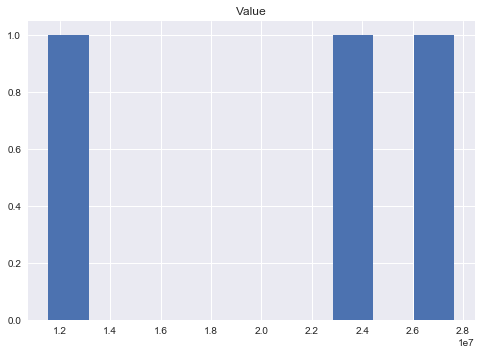

In [18]:
dtsetBoard.hist('Value', bins=10);

## Data about arriveds in Dublin

In [56]:
#Creation of new subdataset with data that we want to.
dtsetArrivalsn = dtsetArrivals[['YEAR', 'MONTH', 'Value']]
dtsetArrivalsn = dtsetArrivalsn.groupby(['YEAR','MONTH'])['Value'].sum()
dtsetArrivalsn = pd.DataFrame(dtsetArrivalsn)

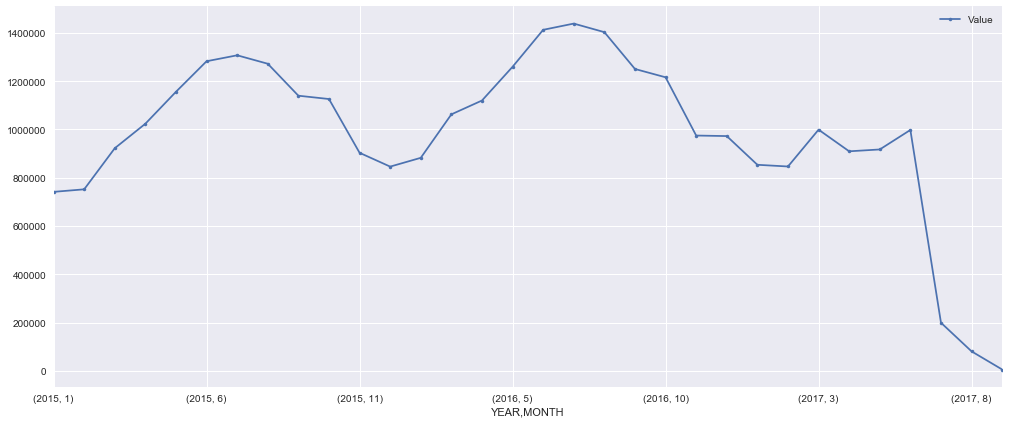

In [57]:
dtsetArrivalsn.plot( style=".-", figsize=(17,7));

Simple graph with number of passengers that arrived in Dublin since 2015. It's possible see that there are some oscillation and the top is betwen June and August of each year what is the summer season. 

In [93]:
dtf = dtsetArrivalsn.pivot_table(columns='YEAR', index='MONTH')
dtf.fillna(0, inplace=True)
X2 = PCA(2, svd_solver="full").fit_transform(dtf)
gmm = GaussianMixture(2)
gmm.fit(dtf)
labels = gmm.predict(dtf)

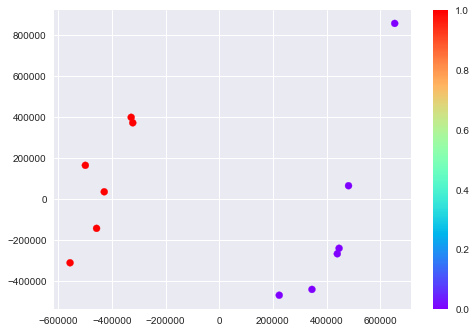

In [95]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap ="rainbow")
plt.colorbar();

In [60]:
dtf

Value                     
YEAR        2015       2016      2017
MONTH                                
1       741526.0   846165.0  853712.0
2       752009.0   882608.0  846632.0
3       922353.0  1062771.0  999294.0
4      1023970.0  1120110.0  909592.0
5      1156314.0  1259963.0  917265.0
6      1282909.0  1413169.0  998078.0
7      1307567.0  1439031.0  199043.0
8      1272554.0  1403476.0   80362.0
9      1140054.0  1250839.0    5178.0
10     1126312.0  1216373.0       0.0
11      903387.0   974971.0       0.0
12           0.0   972728.0       0.0

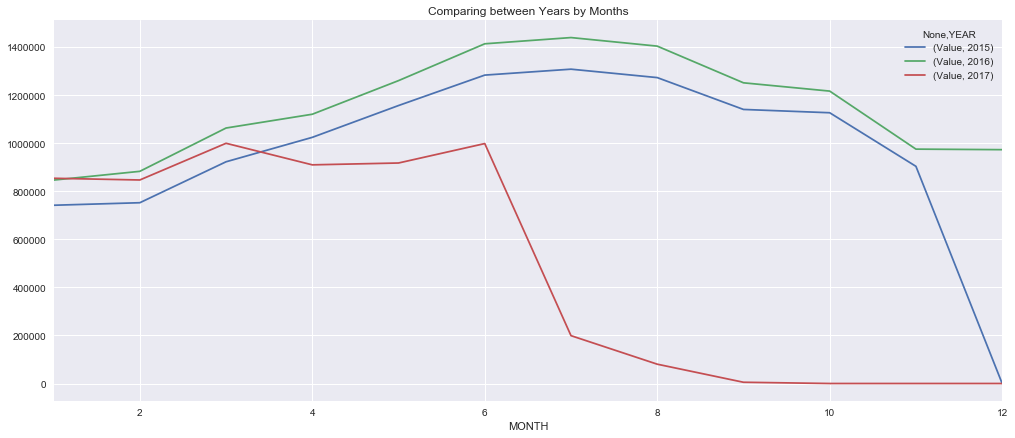

In [61]:
dtf.plot(figsize=(17,7), title="Comparing between Years by Months");

You can see in that graph is that in 2015 and 2016 the lines follow the same way but in December of 2015 there's something wrong that we need to check in the dataset, why there's no passengers arriving in Dublin? It's truth or some wrong input.

In [77]:
dtsetArrivalsD = dtsetArrivals[['DATE','Value']]
grouped = dtsetArrivalsD.groupby(['DATE']).sum()
grouped['Media'] = dtsetArrivalsD.groupby(['DATE']).mean()

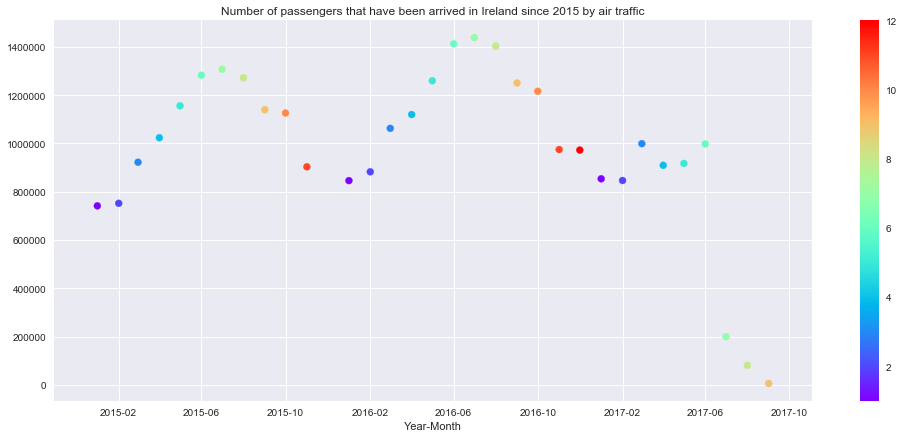

In [87]:
labelsg = grouped.index.month.values
plt.figure(figsize=(17,7))
plt.scatter (grouped.index.values, grouped.Value, c=labelsg, cmap ="rainbow" )
plt.title('Number of passengers that have been arrived in Ireland since 2015 by air traffic')
plt.xlabel('Year-Month'), 
plt.colorbar()
plt.show()

That graph you can see the same result showed in the first Graph but the different way. you can see every month with help of Months rainbow bar. 

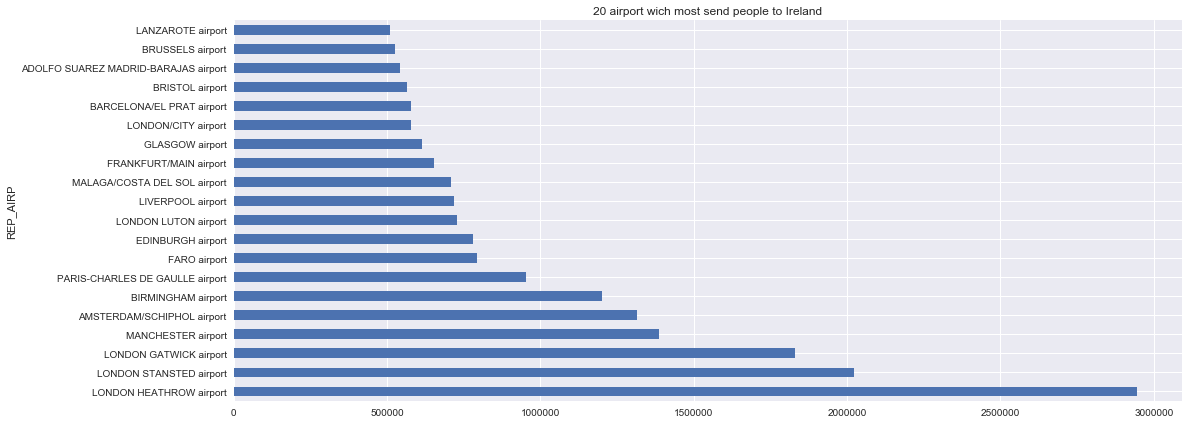

In [101]:
dtsetArrivals.groupby(['REP_AIRP'])['Value'].sum().sort_values(ascending=False).head(20).plot(kind='barh', 
                                                                                              title='20 airport wich most send people to Ireland', figsize = (17,7));

In that graph we see 20 airport wich most send people to Ireland. 

In [214]:
dtArr = dtsetArrivals.groupby(['REP_AIRP', 'YEAR'])['Value'].sum()